In [3]:
from math import *
import numpy as np
import scipy.integrate as integrate
import matplotlib, math
from matplotlib import pyplot as plt

In [12]:
# Hawkes process: exponential kernel version
def intensity_exp(event_times,history):
    mu, alpha, beta = .1, 1, .5
    intensities = []
    for prev_t in history:
        prev_t_int = mu
        for t in event_times:
            prev_t_int += alpha*np.exp(-beta*(prev_t-t)) if prev_t > t else 0
        intensities.append(prev_t_int)
    return intensities
                       

# Hawkes process: power law kernel version
def intensity_plaw(event_times, history):
    mu, alpha, beta, eta = .1, 1, .5, .5
    intensities = []
    for prev_t in history:
        prev_t_int = mu
        for t in event_times:
            prev_t_int += alpha/((prev_t-t + beta)**(eta+1)) if prev_t > t else 0
        intensities.append(prev_t_int)
    return intensities
    
    
    
def power_law_kernel(t,history):
    alpha, beta, theta = .2,.2,.2
    return alpha/(t+beta)^(theta+1)

# # how much of the future actions are caused by previous actions 
# def branching():
#     return integrate.quad(exp_kernel,0,np.inf, args= ())

In [5]:
# https://stackoverflow.com/questions/24785518/how-to-compute-residuals-of-a-point-process-in-python

timesOfInterest = np.linspace(0.0, 10.0, 100)
EventTimes = np.array([0.7, 1.2, 2.0, 3.8, 7.1, 8.2, 8.9, 9.0])
conditionalIntensities = intensity_exp(EventTimes, timesOfInterest)

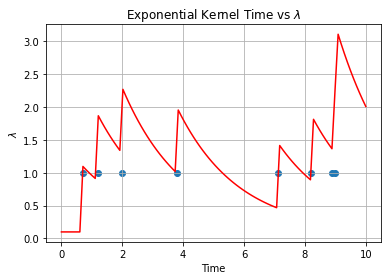

In [6]:
timesOfInterest = np.linspace(0.0, 10.0, 100)
EventTimes = np.array([0.7, 1.2, 2.0, 3.8, 7.1, 8.2, 8.9, 9.0])

fig, ax = plt.subplots()
ax.set_title("Exponential Kernel Time vs $\lambda$")
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("$\lambda$")
ax.scatter(EventTimes,np.ones(len(EventTimes))) # where events happened 
ax.plot(timesOfInterest, conditionalIntensities, color='red')

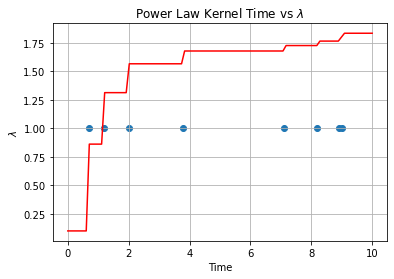

In [14]:
conditionalIntensities = intensity_plaw(EventTimes, timesOfInterest)

fig, ax = plt.subplots()
ax.set_title("Power Law Kernel Time vs $\lambda$")
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("$\lambda$")
ax.scatter(EventTimes,np.ones(len(EventTimes))) # where events happened 
ax.plot(timesOfInterest, conditionalIntensities, color='red')

In [31]:
def thinning(events, history):
    T = 0
    i = 1
    current_T = T
    accepted = []
    while i < len(events): # len of events or history?
        intensity_t = intensity_exp(events,history) #TODO: where to find history? 
        u = np.random.uniform(0,1)
        t = -math.log(u)/intensity_t
        T = T + t
        s = np.random.uniform(0,1)
        if s <= intensity(T)/intensity_t:
            accepted.append(s) 
            current_T = T
            i += 1 
    return accepted 